# 11-experiment-three-cogsci

## Analysis

In [6]:
# Analytical Tools
import random
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# General Utilities
import itertools
import json
import pprint

# Custom Utilities
import utilities.plotting as plotting
import utilities.describe as describe

# Some settings
log = pprint.pprint
%matplotlib inline
pd.options.mode.chained_assignment = None


### Import Data & Define Constants

In [8]:
GROUPS = 2
QUESTIONS = 5
JUDGMENTS = 6
SCORE_THRESHOLD = 240.9

data = pd.read_pickle('data/responses.pkl')
data.head()
print(len(data), data.size)

243 20655


### Analysis

In [12]:
for g_num in range(GROUPS):
    for j_num in range(JUDGMENTS):
        headings = []
        for q_num in range(QUESTIONS):
            headings.append('g{}_q{}_j{}'.format(g_num, q_num, j_num))
        
        rating_mean = data[headings].mean(axis=1)
        data['g{}_j{}_mean'.format(g_num, j_num)] = rating_mean

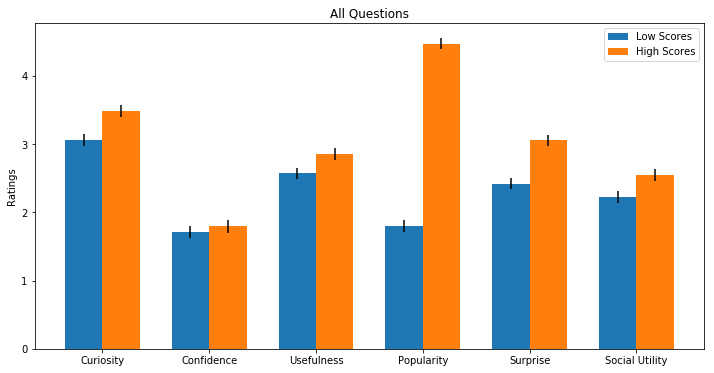

[3.06090534979424, 1.7168724279835395, 2.5720164609053504, 1.8008230452674885, 2.416460905349795, 2.2255144032921814]
[3.4814814814814805, 1.7934156378600823, 2.8551440329218116, 4.471604938271604, 3.0567901234567882, 2.5465020576131705]


In [13]:
PLOTTING_OPTIONS = {
    'ylabel': 'Ratings',
    'ticks': ['Curiosity', 'Confidence', 'Usefulness',
              'Popularity', 'Surprise', 'Social Utility'],
    'legend': ['Low Scores', 'High Scores'],
    'title': 'All Questions',
    'size': (12, 6)
}

# for _ in range(1):
#     sample = data.iloc[random.sample(range(len(data)), len(data))]
    
sample = data

g0_means, g0_errs = [], []
g1_means, g1_errs = [], []
for j_num in range(JUDGMENTS):
    g0_values = sample['g0_j{}_mean'.format(j_num)]
    g1_values = sample['g1_j{}_mean'.format(j_num)]
    g0_means.append(g0_values.mean())
    g1_means.append(g1_values.mean())
    g0_errs.append(stats.sem(g0_values))
    g1_errs.append(stats.sem(g1_values))

plotting.plot_double_bar(
    g0_means, g0_errs, g1_means, g1_errs, 
    **PLOTTING_OPTIONS
)

print(g0_means)
print(g1_means)

In [14]:
print('Low & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g1_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))

Low & High
Curiosity: t = -5.8, p = 2.08e-08, Δ = 0.421 (1 greater)
Confidence: t = -1.24, p = 0.215, Δ = 0.0765 (1 greater)
Usefulness: t = -4.23, p = 3.32e-05, Δ = 0.283 (1 greater)
Popularity: t = -20.3, p = 2.63e-54, Δ = 2.67 (1 greater)
Surprise: t = -6.34, p = 1.1e-09, Δ = 0.64 (1 greater)
Social Utility: t = -5.09, p = 7.13e-07, Δ = 0.321 (1 greater)


In [17]:
#compare exp2a with exp2b here
import pickle

with open('raw-data/exp_two_responses.pkl', 'rb') as f:
    upvote_responses = pickle.load(f) #get exp2a data here
    
for j_num in range(6):
        g0_values = data['g0_j{}_mean'.format(j_num)] #low        
        g2_values = data['g1_j{}_mean'.format(j_num)] #high
        if(j_num >= 4):
            highs = upvote_responses['j{}_high'.format(j_num+1)] #exp2a
            lows = upvote_responses['j{}_low'.format(j_num+1)] #exp2a
        else:
            highs = upvote_responses['j{}_high'.format(j_num)] #exp2a
            lows = upvote_responses['j{}_low'.format(j_num)] #exp2a
        print(g0_values.mean())
        print(lows.mean())
        print(g2_values.mean())
        print(highs.mean())
        print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                  describe.independent_t_test(g0_values, lows)))
        print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                  describe.independent_t_test(highs, g2_values)))
    

3.06090534979424
2.983164983164984
3.4814814814814805
3.4383838383838388
Curiosity: t = 0.67, p = 0.503, Δ = -0.0777 (0 greater)
Curiosity: t = -0.366, p = 0.715, Δ = 0.0431 (1 greater)
1.7168724279835395
1.7299663299663297
1.7934156378600823
1.7804713804713799
Confidence: t = -0.114, p = 0.909, Δ = 0.0131 (1 greater)
Confidence: t = -0.107, p = 0.915, Δ = 0.0129 (1 greater)
2.5720164609053504
2.4296296296296296
2.8551440329218116
2.7649831649831627
Usefulness: t = 1.28, p = 0.201, Δ = -0.142 (0 greater)
Usefulness: t = -0.794, p = 0.428, Δ = 0.0902 (1 greater)
1.8008230452674885
1.827609427609427
4.471604938271604
4.22087542087542
Popularity: t = -0.232, p = 0.817, Δ = 0.0268 (1 greater)
Popularity: t = -2.35, p = 0.0192, Δ = 0.251 (1 greater)
2.416460905349795
2.358922558922558
3.0567901234567882
2.9845117845117857
Surprise: t = 0.55, p = 0.583, Δ = -0.0575 (0 greater)
Surprise: t = -0.662, p = 0.508, Δ = 0.0723 (1 greater)
2.2255144032921814
2.120538720538721
2.5465020576131705
2.59

In [26]:
#compare baseline of exp2a with exp2b
import pickle

with open('raw-data/baseline_2a.pkl', 'rb') as f:
    baseline_data_a = pickle.load(f) #get baseline data here
    
with open('raw-data/baseline_2b.pkl', 'rb') as f:
    baseline_data_b = pickle.load(f) #get baseline data here
    
    
for j_num in range(4):
    if (j_num == 3):
        none_b = baseline_data_b['j{}_mean'.format(j_num)] #baseline 2b
        j_num = 6
        none_lows = baseline_data_a['j{}_low'.format(j_num)]
        none_highs = baseline_data_a['j{}_high'.format(j_num)]
        none2 = [none_lows,none_highs]
        none_a = pd.concat(none2) #baseline 2a
        j_num = 3
    else:
        none_lows = baseline_data_a['j{}_low'.format(j_num)]
        none_highs = baseline_data_a['j{}_high'.format(j_num)]
        none2 = [none_lows,none_highs]
        none_a = pd.concat(none2) #baseline 2a
        none_b = baseline_data_b['j{}_mean'.format(j_num)] #baseline 2b
    print(none_a.mean())
    print(none_b.mean())
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
              describe.independent_t_test(none_a, none_b)))
    

3.349152542372879
3.484172661870501
Curiosity: t = -1.41, p = 0.158, Δ = 0.135 (1 greater)
1.721694915254239
1.6143884892086335
Confidence: t = 1.09, p = 0.276, Δ = -0.107 (0 greater)
2.6498305084745795
2.6496402877697847
Usefulness: t = 0.00201, p = 0.998, Δ = -0.00019 (0 greater)
2.4155932203389856
2.2496402877697848
Popularity: t = 1.78, p = 0.0747, Δ = -0.166 (0 greater)


In [19]:
#compare baseline with upvotes here
import pickle

with open('raw-data/baseline_2b.pkl', 'rb') as f:
    baseline_data = pickle.load(f) #get baseline data here
    
for j_num in range(4):
    
    if(j_num == 3):
        g1_values = baseline_data['j{}_mean'.format(j_num)] #baseline
        j_num = 5
        g0_values = data['g0_j{}_mean'.format(j_num)] #low        
        g2_values = data['g1_j{}_mean'.format(j_num)] #high  
        print(g0_values.mean())
        print(g1_values.mean())
        print(g2_values.mean())
        print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                  describe.independent_t_test(g0_values, g1_values)))
        print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                  describe.independent_t_test(g1_values, g2_values)))
    else:
        g0_values = data['g0_j{}_mean'.format(j_num)] #low
        g1_values = baseline_data['j{}_mean'.format(j_num)] #baseline
        g2_values = data['g1_j{}_mean'.format(j_num)] #high 
        print(g0_values.mean())
        print(g1_values.mean())
        print(g2_values.mean())
        print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                  describe.independent_t_test(g0_values, g1_values)))
        print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                  describe.independent_t_test(g1_values, g2_values)))


3.06090534979424
3.484172661870501
3.4814814814814805
Curiosity: t = -3.8, p = 0.000159, Δ = 0.423 (1 greater)
Curiosity: t = 0.0246, p = 0.98, Δ = -0.00269 (0 greater)
1.7168724279835395
1.6143884892086335
1.7934156378600823
Confidence: t = 0.907, p = 0.365, Δ = -0.102 (0 greater)
Confidence: t = -1.55, p = 0.122, Δ = 0.179 (1 greater)
2.5720164609053504
2.6496402877697847
2.8551440329218116
Usefulness: t = -0.711, p = 0.477, Δ = 0.0776 (1 greater)
Usefulness: t = -1.86, p = 0.0632, Δ = 0.206 (1 greater)
2.2255144032921814
2.2496402877697848
2.5465020576131705
Social Utility: t = -0.221, p = 0.825, Δ = 0.0241 (1 greater)
Social Utility: t = -2.66, p = 0.00806, Δ = 0.297 (1 greater)


In [6]:
g0_confidences = {num: [] for num in range(7)}
g1_confidences = {num: [] for num in range(7)}
for index, row in data.iterrows():
    for q_num in range(QUESTIONS):
        cur_rating = row['g0_q{}_j0'.format(q_num)] - row['g0_j0_mean']
        conf_rating = row['g0_q{}_j1'.format(q_num)]
        g0_confidences[conf_rating].append(cur_rating)
        
        cur_rating = row['g1_q{}_j0'.format(q_num)] - row['g1_j0_mean'] # i do not know what this is for - row['g1_j0_mean'], maybe normalization?
        conf_rating = row['g1_q{}_j1'.format(q_num)]
        g1_confidences[conf_rating].append(cur_rating)
   
all_confidences = {}
for num in range(7):
    all_confidences[num] = g0_confidences[num] + g1_confidences[num]
   

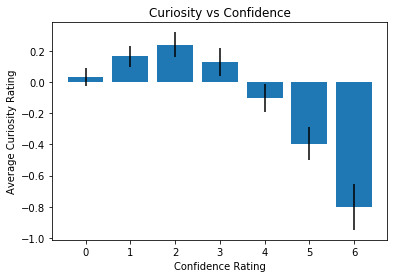

In [7]:
PLOTTING_OPTIONS = {
    'ylabel': 'Average Curiosity Rating',
    'xlabel': 'Confidence Rating',
    'title': 'Curiosity vs Confidence',
}


means = [np.mean(all_confidences[num]) for num in range(7)]
stderr = [stats.sem(all_confidences[num]) for num in range(7)]
    
plotting.plot_single_bar(
    means, stderr,
    **PLOTTING_OPTIONS
)
plt.show()

In [8]:
from sklearn import preprocessing

x_values = []
y_values = []
for num in range(7):
    x_values += [num / 6 for _ in range(len(all_confidences[num]))]
    y_values += all_confidences[num]

x_values = np.reshape(np.array(x_values), (-1, 1))
y_values = np.reshape(np.array(y_values), (-1, 1))
x_values_quadratic = preprocessing.PolynomialFeatures(2).fit_transform(x_values)

In [9]:
import statsmodels.api as sm
results = sm.OLS(y_values, x_values_quadratic).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     30.28
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           1.03e-13
Time:                        17:00:11   Log-Likelihood:                -4409.6
No. Observations:                2380   AIC:                             8825.
Df Residuals:                    2377   BIC:                             8843.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0321      0.047      0.682      0.495      -0.060       0.124
x1             1.2238      0.320      3.829      0.000       0.597       1.851
x2            -2.0748      0.362     -5.738      0.000      -2.784      -1.366
==============================================================================
Omnibus:                        4.076   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.046
Skew:                          -0.101   Prob(JB):                        0.132
Kurtosis:                       3.014   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
result = results.params

print('Best Polynomial')
print('y = {:.4}x^2 + {:.4}x + {:.4}'.format(result[2], result[1], result[0]))
print('y = {:.4}x(1 - x) + {:.4}x '.format(-result[2], result[1] + result[2], result[0]))

Best Polynomial
y = -2.075x^2 + 1.224x + 0.03208
y = 2.075x(1 - x) + -0.851x 


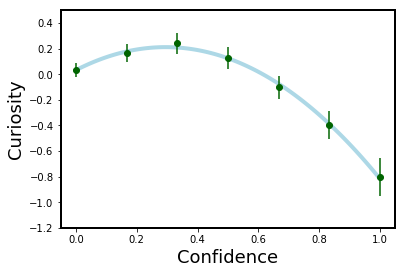

In [33]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2 #set the value globally
ax = plt.figure()
poly = np.poly1d(list(reversed(result)))
x_ticks = np.linspace(0, 1, 100)
plt.errorbar(np.linspace(0, 1, 7), means, stderr, color='darkgreen', marker='o', linestyle="None",zorder=2)
plt.plot(x_ticks, poly(x_ticks), '-', linewidth=4.0, color='lightblue', zorder=1)
plt.ylim([-1.2, 0.5])
plt.xlabel('Confidence',fontsize=18)
plt.ylabel('Curiosity',fontsize=18)


ax.savefig('u-shape.png', bbox_inches='tight', dpi=1200)
